# Library

In [12]:
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  

# Create a Dataframe for each clusters of csv files

In [13]:
folder_path = '.'
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

In [14]:
results = []
# Read each CSV file and calculate the value_counts for the 'cluster' attribute
for file in tqdm(csv_files, desc='Reading files', unit='file'):
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    
    if 'cluster' in df.columns:
        value_counts = df['cluster'].value_counts()
        for cluster, count in value_counts.items():
            results.append({'file': file.rstrip('.csv'), 'cluster': cluster, 'count': count})
    else:
        print(f'The file {file} does not contain the "cluster" column.')

Reading files: 100%|██████████| 25/25 [01:28<00:00,  3.56s/file]


In [15]:
df_results = pd.DataFrame(results)
pivot_table = df_results.pivot_table(index='file', columns='cluster', values='count', fill_value=0).astype(int)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table

cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Total
file,,,,,,,,,,,,,,,,,,,,,
distiluse_UMAP_hdbscan_not_batch_0.02_window30,6062,1391,3822,3413,5467,3853,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24008
distiluse_UMAP_kmeans_10_window30,6582,8196,6967,12488,1648,9712,8495,3309,3322,6016,0,0,0,0,0,0,0,0,0,0,66735
distiluse_UMAP_kmeans_15_window30,7285,6375,3591,7354,4950,6982,3996,5761,1115,4871,2454,4546,2477,1947,3031,0,0,0,0,0,66735
distiluse_nored_agglomerative_10,18704,16810,5333,9796,2825,2610,3293,3282,1845,2237,0,0,0,0,0,0,0,0,0,0,66735
distiluse_nored_kmeans_10_window30,8365,11445,3526,2278,3345,7590,5366,11812,4171,8837,0,0,0,0,0,0,0,0,0,0,66735
distiluse_tSNE_agglomerative_10,9154,8315,7560,6312,7765,5190,6264,6224,5017,4934,0,0,0,0,0,0,0,0,0,0,66735
distiluse_tSNE_agglomerative_15,4806,4629,4861,3972,4353,4000,2809,3056,3065,3144,2802,3532,4150,2716,2465,2339,2852,2559,2466,2159,66735
distiluse_tSNE_agglomerative_20,4710,4335,3861,3905,4464,3829,3717,2455,3238,3778,3715,3803,2815,3021,3565,2088,2630,2318,2065,2423,66735
distiluse_tSNE_agglomerative_3_22250_window30,30602,19582,16551,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66735


# Plot Distribution

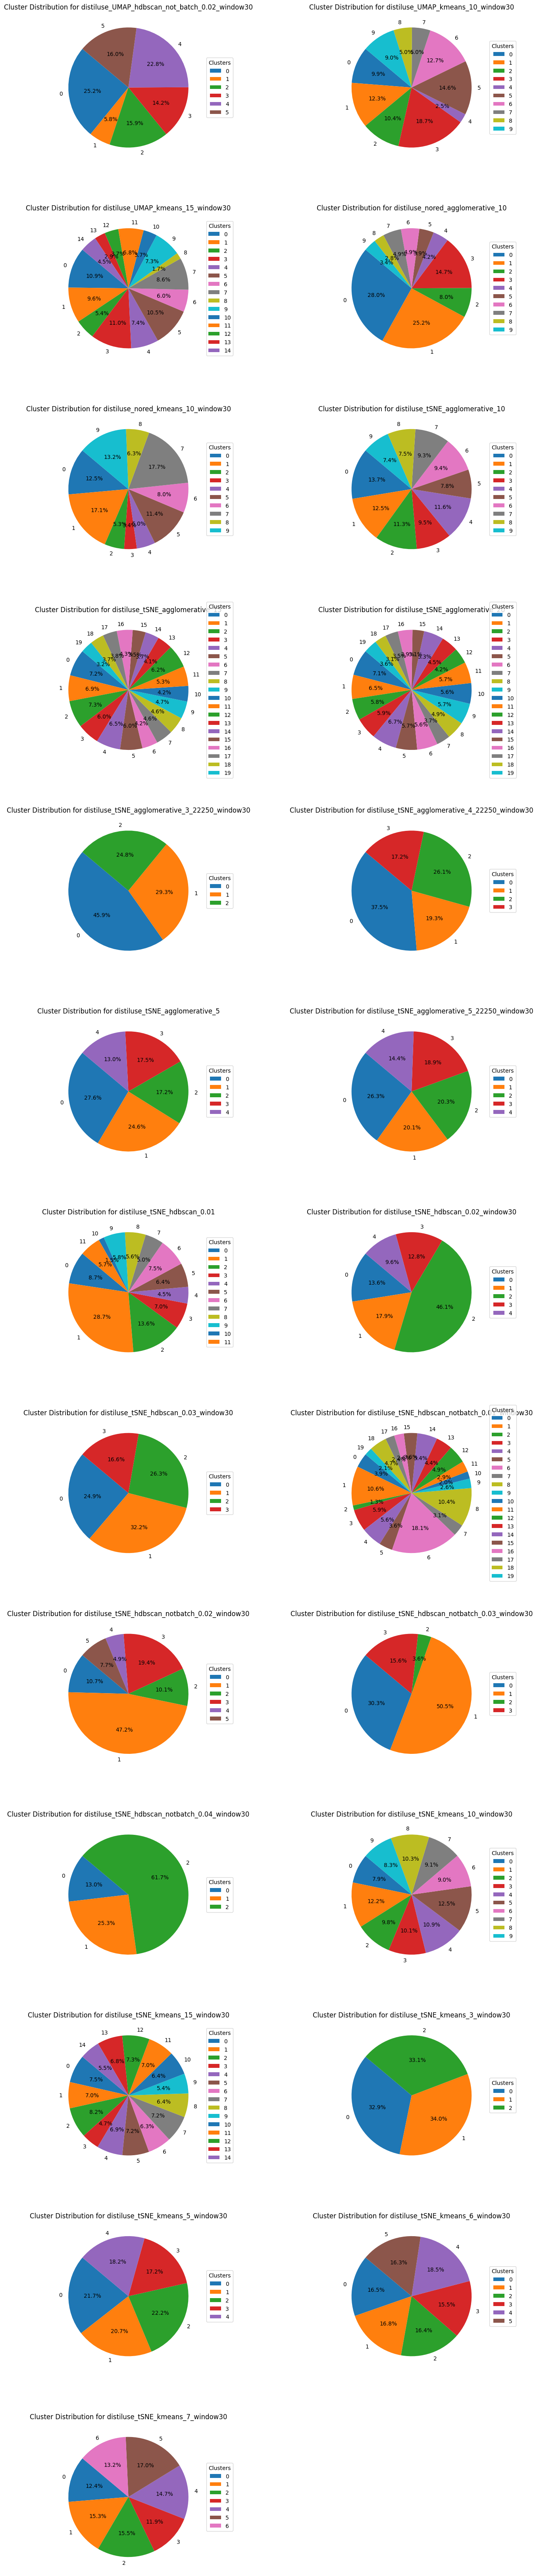

In [16]:
try:
    pivot_table.drop(columns='Total', inplace=True)
except KeyError:
    pass
# Calculate number of subplot rows needed
num_files = len(pivot_table.index)
num_cols = 2
num_rows = (num_files + num_cols - 1) // num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
fig.subplots_adjust(hspace=0.5)

# Iterate over each file and create pie charts
for idx, file in enumerate(pivot_table.index):
    row = idx // num_cols
    col = idx % num_cols
    ax = axs[row, col]
    
    cluster_counts = pivot_table.loc[file]
    labels = cluster_counts.index[cluster_counts > 0]  # Select only clusters with count > 0
    sizes = cluster_counts[cluster_counts > 0].values

    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_aspect('equal')
    ax.set_title(f'Cluster Distribution for {file}')
    ax.legend(wedges, labels, title="Clusters", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Remove any empty subplots if the number of files doesn't fill all subplots
for idx in range(num_files, num_rows * num_cols):
    row = idx // num_cols
    col = idx % num_cols
    fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()

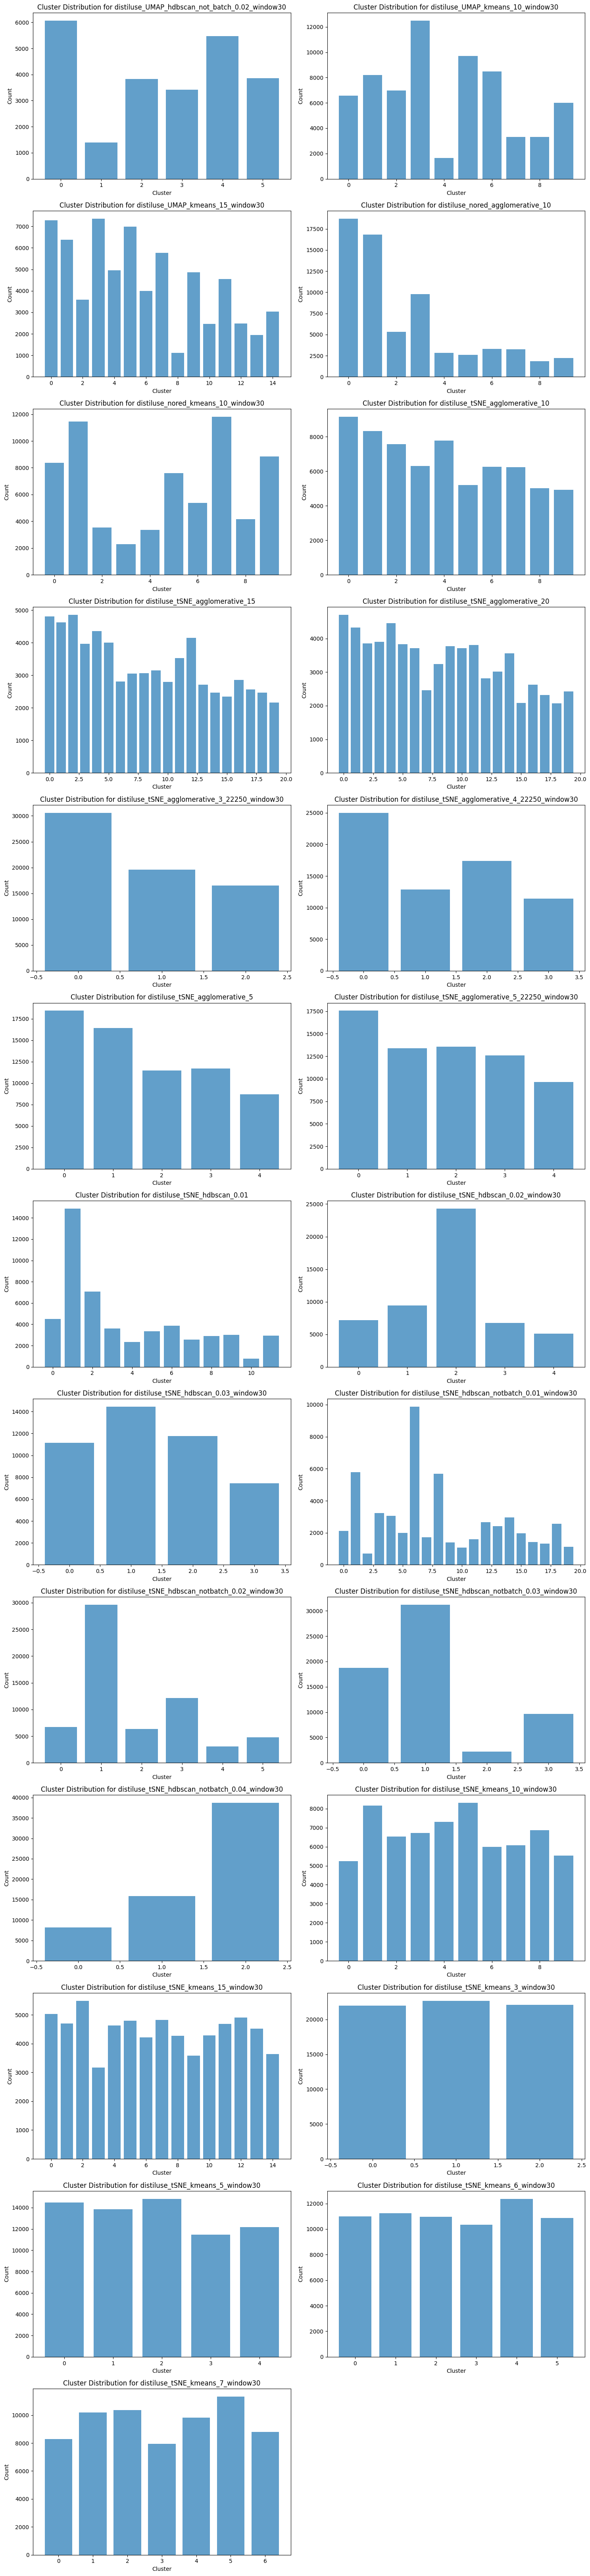

In [17]:
num_files = len(pivot_table.index)
num_cols = 2
num_rows = (num_files + num_cols - 1) // num_cols  # Round up division

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
fig.subplots_adjust(hspace=0.5)

for idx, file in enumerate(pivot_table.index):
    row = idx // num_cols
    col = idx % num_cols
    ax = axs[row, col]
    
    cluster_counts = pivot_table.loc[file]
    labels = cluster_counts.index[cluster_counts > 0]  # Select only clusters with count > 0
    sizes = cluster_counts[cluster_counts > 0].values

    ax.bar(labels, sizes, align='center', alpha=0.7)
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')
    ax.set_title(f'Cluster Distribution for {file}')
    
# Remove any empty subplots if the number of files doesn't fill all subplots
for idx in range(num_files, num_rows * num_cols):
    row = idx // num_cols
    col = idx % num_cols
    fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()